![title](Img/logo.png)


![title](Img/photodune-5288878-new-york-city-cityscape-m.jpg)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from scipy import sparse
# import xgboost as xgb
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from __future__ import division
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
# Train and test data (NAs as outcomes for the target variable on the test set)
#full_df = pd.read_csv("data/ready/model.csv")

# Train data
train_x = pd.read_csv("data/ready/train_df_ready_boruta.csv")
train_y = pd.read_csv("data/ready/outcome.csv")

# Test data
test_x = pd.read_csv("data/ready/test_df_fit.csv")

In [10]:
# train_y = known outcome of the target variable for the training set. 
target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_y['interest_level'].apply(lambda x: target_num_map[x]))
print(train_y)

[1 1 2 ..., 1 1 2]


In [12]:
#train_x = train_x.drop(['listing_id', 'interest_level'], axis=1)
train_x.head()

,bathrooms,bedrooms,building_good,manager_good,manager_bad,listing_bad,anger,anticipation,disgust,fear,...,positive,Avenue,Street,wood,laundry,elevator,Bath.5,hide,price_log,ordered_kmclusters
0,1.0,0,0,0,0,0,0,2,0,0,...,5,0,1,1,1,0,0,0,7.783224,27
1,1.0,0,0,0,0,0,0,2,0,1,...,6,0,1,1,1,0,0,0,7.707512,27
2,1.0,1,0,0,0,0,0,3,0,0,...,7,0,1,1,1,0,0,0,7.935587,23
3,1.0,1,0,0,0,0,1,3,0,0,...,7,1,0,1,1,0,0,0,7.967280,30
4,1.0,0,0,0,0,0,0,3,0,0,...,7,0,1,1,1,0,0,0,7.861342,18


In [13]:
#test_x = test_x.drop(['listing_id'], axis=1)
test_x.head()

,bathrooms,bedrooms,building_good,manager_good,manager_bad,listing_bad,anger,anticipation,disgust,fear,...,positive,Avenue,Street,wood,laundry,elevator,Bath.5,hide,price_log,ordered_kmclusters
0,1.0,0,0,0,0,0,0,2,0,0,...,5,0,1,1,0,0,0,0,7.727094,17
1,1.0,1,0,0,0,0,1,2,0,0,...,9,0,1,1,1,0,0,0,8.086410,29
2,1.0,0,0,0,0,0,0,3,0,0,...,11,0,1,0,1,0,0,0,7.649693,26
3,1.0,1,0,0,0,0,1,3,1,0,...,8,0,1,1,1,0,0,0,7.919356,21
4,1.0,0,0,0,0,0,0,2,0,0,...,10,0,1,1,1,0,0,0,7.693937,27


# Data preparation 

- See the 1._Data_Preparation.Rmd (or Html output)

# First feature selection 

- See the Model.Rmd

![title](Img/Boruta.png)


In [19]:
boruta = pd.read_csv("data/ready/boruta.csv")
boruta

,attr,meanImp,medianImp,minImp,maxImp,normHits,decision
0,price_log,107.999207,108.386547,101.869944,116.393701,1.000000,Confirmed
1,manager_good,79.655562,79.545423,74.778450,82.278406,1.000000,Confirmed
2,hide,69.265495,69.349824,65.040295,73.864973,1.000000,Confirmed
3,bedrooms,68.698860,68.772825,65.384557,72.847498,1.000000,Confirmed
4,positive,57.586411,57.626517,52.695491,62.461288,1.000000,Confirmed
5,wood,56.230317,56.354516,52.754775,58.787386,1.000000,Confirmed
6,ordered_kmclusters,52.557682,52.545762,47.587134,55.866239,1.000000,Confirmed
7,laundry,49.653009,49.750493,46.243838,55.359304,1.000000,Confirmed
8,building_good,42.194751,41.907271,38.889374,46.443102,1.000000,Confirmed
9,anticipation,40.095647,40.024291,37.280784,43.048175,1.000000,Confirmed


# Model-Based Feature Selection

We will use a random forest model to judge the importance of each feature.

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=22),
    threshold="median")

In [15]:
select.fit(train_x, train_y)
X_train_l1 = select.transform(train_x)
print("X_train.shape: {}".format(train_x.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (49352, 25)
X_train_l1.shape: (49352, 13)


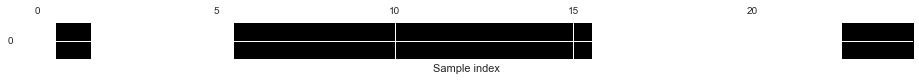

In [16]:
# Second feature selection
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

# Xgboost

- Xgboost see script.py